In [1]:
import json
import os
import fastwer
import re
import nltk
import numpy as np
import pandas as pd
from rouge_score import rouge_scorer

In [81]:
bart_results

,input_text,target_text,pred_text
0,hanno rot of his expedition in stel,Hannu wrote of his expedition in stone.,"Hanno wrote of his expedition in ""Stel""."
1,little enla difer for many other meimhberhoods...,Little India differs from many other neighbour...,Little Italy differs from many other meer neig...
2,u as us had the obbelity to fogt on the song t...,Users had the ability to vote on the songs the...,You as well have the ability to flow on the so...
3,his majors possor is ungariicolmunications a t...,"His major sponsor is Algario Communications, a...","His major concern is ungambler communications,..."
4,the mansion also has a marriage office,The mansion also has a marriage office.,The mansion also has a marriage office.
...,...,...,...
1995,i wer return ears mashare bebot this mist him,After three years the shareholders dismissed him.,"I will return to my studies tomorrow, be sure ..."
1996,one of the man oite arept es an antanpent oftu...,One of the main positive effects is an enhance...,One of the main attractions is an underground ...
1997,we ced stated that he himself with cattolic,Weikath stated that he himself is Catholic.,He stated that he himself was Catholic.
1998,the judge groled a complaint was not wellid fo...,The judge ruled the complaint was not valid pe...,The judge ruled that the complaint was not wel...


In [94]:
np.percentile(werlistb, 75)

0.769231

In [87]:
np.median(werlistb)

0.5

In [96]:
for index, row in bart_results.iterrows():
    y = row['target_text']
    pred = row['pred_text']
    inpt = row['input_text']
    
    w = fastwer.score_sent(pred, y)
#     print(w)
    if w>77:
        print(inpt)
        print(pred)
        print(y)
        print(w)
        print()

all i was turnedi fi it
All I was talking about was it.
Oh, I was terrified!
125.0

after itime itey frestines charman of the hiterabar sitry wats company
After a time, it became the corporate home of the Hagerstown Sugar Works company.
After retirement, he functioned as Chairman of the Hyderabad State Railway Company.
91.6667

he recognized the councel ose and the high date rich
He recognized the courage of the young man and the high date of the rich.
He recognised the Council House and the Highgate Ridge.
122.2222

thus opresident was sait
The President was surprised.
Thus, a precedent was set.
80.0

combine city an elaki an jurdonin contertacs preented iny for thel is verreally gains
Comprising city and county government and private sector representatives, the constituency is truly gains.
Combined Syrian, Iraqi and Jordanian counterattacks prevented any further Israeli gains.
109.0909

for seemple broof using for bein tere setedffencees
For example, a spoon may be used for both spad

Savage worked in Samuel Booth's print shop and took odd jobs.
90.9091

is intermant vaslofte il en mingons an wod semetry
It is interlaced with the names of individuals in Western philosophy.
His interment was located in Birmingham's Elmwood Cemetery.
137.5

thenings late aways mon begust borms and other faniches thaf msis
Dancing late at night on a February date is a very dangerous activity.
A building society provides mortgages, loans and other financial services
130.0

there were even stuodent produced by the otramas featuing a witor scrips and selifexs
There were even stutters produced by the otter, resembling otter scatops and squeals.
There were even student-produced radio dramas featuring original scripts and sound effects.
83.3333

dura willed worlwon he lentin mushlov ith parents
Darren was born in London, the sixth child of his parents.
During World War One he lived in Russia with his parents.
81.8182

his expedition was fund thed choinely bake rigorie shelley coff and pava l

In [2]:
with open('gold_transcripts.json') as json_file:
    gold = json.load(json_file)

In [3]:
with open('./CTC_baseline_splits/test.json') as json_file:
    ctc_test = json.load(json_file)
    
with open('./CTC_LM_rescore_splits/test.json') as json_file:
    ctc_lm_test = json.load(json_file)
    
bart_cnn_results = pd.read_pickle("./s2s/bart-cnn/bartcnnlast_output.pkl")
rbert_results = pd.read_pickle("./s2s/rbert/rbert.pkl")
roberta_results = pd.read_pickle("./s2s/roberta/roberta.pkl")
bert_results = pd.read_pickle("./s2s/bert/bert.pkl")
char_results = pd.read_pickle("./s2s/char/charb.pkl")
bart_results = pd.read_pickle("./s2s/bart/bart_output.pkl")
dbart_results = pd.read_pickle("./s2s/distilbart/distilbart_output.pkl")

In [5]:
werlist = []
werlistl = []
werlistbart_cnn_results = []
werlistrbert_results = []
werlistroberta_results = []
werlistbert_results = []
werlistdb = []
werlistb = []
werlistch = []

cerlistch = []
cerlistb = []
cerlistdb = []
cerlistl = []
cerlist = []
cerlistbart_cnn_results = []
cerlistrbert_results = []
cerlistroberta_results = []
cerlistbert_results = []


for key, pred in ctc_test.items():
    y = gold[key]
    cerlist.append(fastwer.score_sent(pred, y, char_level=True))
    werlist.append(fastwer.score_sent(pred, y))

for key, pred in ctc_lm_test.items():
    y = gold[key]
    cerlistl.append(fastwer.score_sent(pred, y, char_level=True))
    werlistl.append(fastwer.score_sent(pred, y))
    
for index, row in bart_results.iterrows():
    y = row['target_text']
    pred = row['pred_text']
    
    cerlistb.append(fastwer.score_sent(pred, y, char_level=True))
    werlistb.append(fastwer.score_sent(pred, y))
    
for index, row in dbart_results.iterrows():
    y = row['target_text']
    pred = row['pred_text']
    
    cerlistdb.append(fastwer.score_sent(pred, y, char_level=True))
    werlistdb.append(fastwer.score_sent(pred, y))

for index, row in char_results.iterrows():
    y = row['target_text']
    pred = row['pred_text']
    
    cerlistch.append(fastwer.score_sent(pred, y, char_level=True))
    werlistch.append(fastwer.score_sent(pred, y))

for index, row in bart_cnn_results.iterrows():
    y = row['target_text']
    pred = row['pred_text']
    
    cerlistbart_cnn_results.append(fastwer.score_sent(pred, y, char_level=True))
    werlistbart_cnn_results.append(fastwer.score_sent(pred, y))
    
for index, row in rbert_results.iterrows():
    y = row['target_text']
    pred = row['pred_text']
    
    cerlistrbert_results.append(fastwer.score_sent(pred, y, char_level=True))
    werlistrbert_results.append(fastwer.score_sent(pred, y))
    
for index, row in roberta_results.iterrows():
    y = row['target_text']
    pred = row['pred_text']
    
    cerlistroberta_results.append(fastwer.score_sent(pred, y, char_level=True))
    werlistroberta_results.append(fastwer.score_sent(pred, y))
    
for index, row in bert_results.iterrows():
    y = row['target_text']
    pred = row['pred_text']
    
    cerlistbert_results.append(fastwer.score_sent(pred, y, char_level=True))
    werlistbert_results.append(fastwer.score_sent(pred, y))

In [6]:
print(np.average(werlist))
print(np.average(cerlist))
print()
print(np.average(werlistl))
print(np.average(cerlistl))
print()

68.54627965000002
26.7606619

59.933487549999995
29.6005387



In [7]:
print(np.average(werlistch))
print(np.average(cerlistch))
print()
print(np.average(werlistdb))
print(np.average(cerlistdb))
print()
print(np.average(werlistb))
print(np.average(cerlistb))
print()
print(np.average(werlistroberta_results))
print(np.average(cerlistroberta_results))
print()
print(np.average(werlistbert_results))
print(np.average(cerlistbert_results))
print()
print(np.average(werlistbart_cnn_results))
print(np.average(cerlistbart_cnn_results))
print()
print(np.average(werlistrbert_results))
print(np.average(cerlistrbert_results))
print()

206.27353094999998
168.8896757

58.10706135
38.94270699999999

53.8215867
36.62735255

95.66702255
101.1435911

355.76839995
288.13556875

192.5756586
191.808131

263.5511867
167.6621016



In [8]:
import numpy as np
print(np.average(werlist))
print(np.average(werlistl))

print(np.average(cerlist))
print(np.average(cerlistl))

68.54627965000002
59.933487549999995
26.7606619
29.6005387


In [9]:
print(np.median(werlist))
print(np.median(werlistl))

print(np.median(cerlist))
print(np.median(cerlistl))

69.2308
58.3333
25.0
26.5006


In [10]:
import pandas as pd

bart_results = pd.read_pickle("./s2s/bart/bart_output.pkl")

In [11]:
werlistb = []
cerlistb = []

for index, row in bart_results.iterrows():
    y = row['target_text']
    pred = row['pred_text']
    
    cerlistb.append(fastwer.score_sent(pred, y, char_level=True))
    werlistb.append(fastwer.score_sent(pred, y))

In [12]:
print(np.average(werlistb))
print(np.median(werlistb))

print(np.median(cerlistb))
print(np.average(cerlistb))

#a paragraph about how our results fit into general space-> not best score, but TREND is what we want to show

53.8215867
50.0
35.1114
36.62735255


In [25]:
bart_cnn_results = pd.read_pickle("./s2s/bart-cnn/bartcnnlast_output.pkl")
rbert_results = pd.read_pickle("./s2s/rbert/rbert.pkl")
roberta_results = pd.read_pickle("./s2s/roberta/roberta.pkl")
bert_results = pd.read_pickle("./s2s/bert/bert.pkl")

In [26]:
werlistbart_cnn_results = []
werlistrbert_results = []
werlistroberta_results = []
werlistbert_results = []
cerlistbart_cnn_results = []
cerlistrbert_results = []
cerlistroberta_results = []
cerlistbert_results = []

for index, row in bart_cnn_results.iterrows():
    y = row['target_text']
    pred = row['pred_text']
    
    cerlistbart_cnn_results.append(fastwer.score_sent(pred, y, char_level=True))
    werlistbart_cnn_results.append(fastwer.score_sent(pred, y))
    
for index, row in rbert_results.iterrows():
    y = row['target_text']
    pred = row['pred_text']
    
    cerlistrbert_results.append(fastwer.score_sent(pred, y, char_level=True))
    werlistrbert_results.append(fastwer.score_sent(pred, y))
    
for index, row in roberta_results.iterrows():
    y = row['target_text']
    pred = row['pred_text']
    
    cerlistroberta_results.append(fastwer.score_sent(pred, y, char_level=True))
    werlistroberta_results.append(fastwer.score_sent(pred, y))
    
for index, row in bert_results.iterrows():
    y = row['target_text']
    pred = row['pred_text']
    
    cerlistbert_results.append(fastwer.score_sent(pred, y, char_level=True))
    werlistbert_results.append(fastwer.score_sent(pred, y))

In [27]:
print(np.average(werlistbert_results))
print(np.average(werlistroberta_results))
print(np.average(werlistrbert_results))
print(np.average(werlistbart_cnn_results))

355.76839995
95.66702255
263.5511867
192.5756586


In [13]:
len(cerlist)

2000

In [14]:
#divide by 100
werlist = np.array(werlist)/100.0
werlistl = np.array(werlistl)/100.0
werlistb = np.array(werlistb)/100.0
cerlist = np.array(cerlist)/100.0
cerlistl = np.array(cerlistl)/100.0
cerlistb = np.array(cerlistb)/100.0

In [15]:
bleulist = []
bleulistl = []
bleulistb = []

for index, row in bart_results.iterrows():
    y = row['target_text']
    pred = row['pred_text']
    
    hypothesis = re.sub("[^\w\s]", "", pred)
    reference = re.sub("[^\w\s]", "", y)
    
    #there may be several references
    BLEUscore = nltk.translate.bleu_score.sentence_bleu([reference], hypothesis)
    bleulistb.append(BLEUscore)

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order i

In [16]:
for key, pred in ctc_test.items():
    y = gold[key]
    hypothesis = re.sub("[^\w\s]", "", pred)
    reference = re.sub("[^\w\s]", "", y)
    bleulist.append(nltk.translate.bleu_score.sentence_bleu([reference], hypothesis))

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


In [17]:
for key, pred in ctc_lm_test.items():
    y = gold[key]
    hypothesis = re.sub("[^\w\s]", "", pred)
    reference = re.sub("[^\w\s]", "", y)
    bleulistl.append(nltk.translate.bleu_score.sentence_bleu([reference], hypothesis))

/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/ec2-user/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/nltk/translate/bleu_score.py:523: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order i

In [18]:
print(np.average(bleulist))
print(np.average(bleulistl))
print(np.average(bleulistb))
print()
print(np.median(bleulist))
print(np.median(bleulistl))
print(np.median(bleulistb))

0.6316670610085225
0.6247833166254256
0.6059444179455299

0.6484479888413773
0.6695334146644533
0.6154152266758042


In [19]:
mbleulist = []
mbleulistl = []
mbleulistb = []

for index, row in bart_results.iterrows():
    y = row['target_text']
    pred = row['pred_text']
    
    hypothesis = re.sub("[^\w\s]", "", pred)
    reference = re.sub("[^\w\s]", "", y)
    
    #there may be several references
    BLEUscore = float(nltk.translate.bleu_score.modified_precision([reference], hypothesis, n=1))
    mbleulistb.append(BLEUscore)

for key, pred in ctc_test.items():
    y = gold[key]
    hypothesis = re.sub("[^\w\s]", "", pred)
    reference = re.sub("[^\w\s]", "", y)
    mbleulist.append(float(nltk.translate.bleu_score.modified_precision([reference], hypothesis, n=1)))

for key, pred in ctc_lm_test.items():
    y = gold[key]
    hypothesis = re.sub("[^\w\s]", "", pred)
    reference = re.sub("[^\w\s]", "", y)
    mbleulistl.append(float(nltk.translate.bleu_score.modified_precision([reference], hypothesis, n=1)))

print(np.average(mbleulist))
print(np.average(mbleulistl))
print(np.average(mbleulistb))
print()
print(np.median(mbleulist))
print(np.median(mbleulistl))
print(np.median(mbleulistb))

0.8782255038877329
0.9104178786600187
0.8347574750166684

0.8888888888888888
0.9230769230769231
0.8421052631578947


In [20]:
rougelist = []
rougelistl = []
rougelistb = []
rougelist2 = []
rougelistl2 = []
rougelistb2 = []
rougelistl = []
rougelistll = []
rougelistbl = []

for index, row in bart_results.iterrows():
    y = row['target_text']
    pred = row['pred_text']
    
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL', 'rouge2'], use_stemmer=True)
    scores = scorer.score(y, pred)
    
    rougelistb.append(scores['rouge1'])
    rougelistb2.append(scores['rouge2'])
    rougelistbl.append(scores['rougeL'])

for key, pred in ctc_test.items():
    y = gold[key]
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL', 'rouge2'], use_stemmer=True)
    scores = scorer.score(y, pred)
    rougelist.append(scores['rouge1'])
    rougelist2.append(scores['rouge2'])
    rougelistl.append(scores['rougeL'])

for key, pred in ctc_lm_test.items():
    y = gold[key]
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL', 'rouge2'], use_stemmer=True)
    scores = scorer.score(y, pred)
    rougelist.append(scores['rouge1'])
    rougelist2.append(scores['rouge2'])
    rougelistll.append(scores['rougeL'])

print(np.average(rougelist))
print(np.average(rougelistl))
print(np.average(rougelistb))
print()
print(np.median(rougelist))
print(np.median(rougelistl))
print(np.median(rougelistb))

0.5887164014308742
0.5334786429035524
0.5996372284119943

0.6
0.5384615384615384
0.625


In [21]:
rougelist

[Score(precision=0.5714285714285714, recall=0.5714285714285714, fmeasure=0.5714285714285714),
 Score(precision=0.5833333333333334, recall=0.5833333333333334, fmeasure=0.5833333333333334),
 Score(precision=0.46153846153846156, recall=0.5454545454545454, fmeasure=0.4999999999999999),
 Score(precision=0.5, recall=0.5, fmeasure=0.5),
 Score(precision=1.0, recall=1.0, fmeasure=1.0),
 Score(precision=0.75, recall=0.75, fmeasure=0.75),
 Score(precision=0.6363636363636364, recall=0.7, fmeasure=0.6666666666666666),
 Score(precision=0.7142857142857143, recall=0.8333333333333334, fmeasure=0.7692307692307692),
 Score(precision=0.8333333333333334, recall=0.8333333333333334, fmeasure=0.8333333333333334),
 Score(precision=0.5833333333333334, recall=0.5833333333333334, fmeasure=0.5833333333333334),
 Score(precision=0.75, recall=0.6666666666666666, fmeasure=0.7058823529411765),
 Score(precision=0.7692307692307693, recall=0.7692307692307693, fmeasure=0.7692307692307693),
 Score(precision=0.5833333333333

In [ ]:
print(np.average(rougelist2))
print(np.average(rougelistl2))
print(np.average(rougelistb2))
print()
print(np.median(rougelist2))
print(np.median(rougelistl2))
print(np.median(rougelistb2))

In [ ]:
print(np.average(rougelist2l))
print(np.average(rougelistl2l))
print(np.average(rougelistb2l))
print()
print(np.median(rougelist2l))
print(np.median(rougelistl2l))
print(np.median(rougelistb2l))

In [28]:
import matplotlib.pyplot as plt

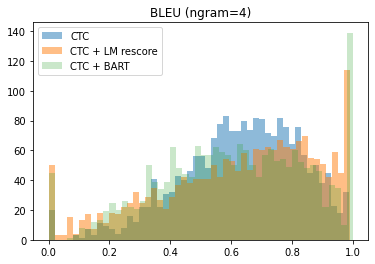

In [44]:
#high fluency: https://zhu45.org/posts/2018/Mar/28/bleu-a-method-for-automatic-evaluation-of-machine-translation/

binct = 50

plt.hist(bleulist, bins=binct, alpha=0.5, label='CTC')
plt.hist(bleulistl, bins=binct, alpha=0.5, label='CTC + LM rescore')
plt.hist(bleulistb, bins=binct, alpha=0.25, label='CTC + BART')
plt.legend(loc='upper left')
plt.title("BLEU (ngram=4)")
plt.show()

#appendix -> ordinal ranking; CER analysis; character model as well as a language model; finetune on LM; 

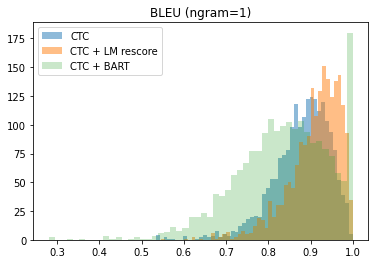

In [43]:
#high adequacy

binct = 50

plt.hist(mbleulist, bins=binct, alpha=0.5, label='CTC')
plt.hist(mbleulistl, bins=binct, alpha=0.5, label='CTC + LM rescore')
plt.hist(mbleulistb, bins=binct, alpha=0.25, label='CTC + BART')
plt.legend(loc='upper left')
plt.title("BLEU (ngram=1)")
plt.show()

#appendix - stratified sampling of model's output from each quartile for each model (sentences + ground truths)

In [ ]:
binct = 50

plt.hist(rougelist, bins=binct, alpha=0.5, label='CTC')
plt.hist(rougelistl, bins=binct, alpha=0.5, label='CTC + LM rescore')
plt.hist(rougelistb, bins=binct, alpha=0.25, label='CTC + BART')
plt.legend(loc='upper left')
plt.title("ROUGE-1")
plt.show()

In [ ]:
binct = 50

plt.hist(rougelist2, bins=binct, alpha=0.5, label='CTC')
plt.hist(rougelistl2, bins=binct, alpha=0.5, label='CTC + LM rescore')
plt.hist(rougelistb2, bins=binct, alpha=0.25, label='CTC + BART')
plt.legend(loc='upper left')
plt.title("ROUGE-2")
plt.show()

In [ ]:
binct = 50

plt.hist(rougelistl, bins=binct, alpha=0.5, label='CTC')
plt.hist(rougelistll, bins=binct, alpha=0.5, label='CTC + LM rescore')
plt.hist(rougelistbl, bins=binct, alpha=0.25, label='CTC + BART')
plt.legend(loc='upper left')
plt.title("ROUGE-L")
plt.show()

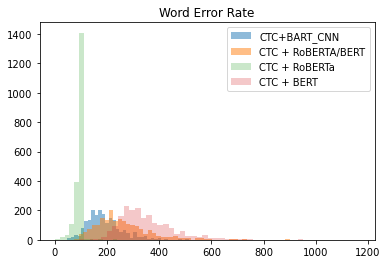

In [30]:
binct = 50

plt.hist(werlistbart_cnn_results, bins=binct, alpha=0.5, label='CTC+BART_CNN')
plt.hist(werlistrbert_results, bins=binct, alpha=0.5, label='CTC + RoBERTA/BERT')
plt.hist(werlistroberta_results, bins=binct, alpha=0.25, label='CTC + RoBERTa')
plt.hist(werlistbert_results, bins=binct, alpha=0.25, label='CTC + BERT')
plt.legend(loc='upper right')
plt.title("Word Error Rate")
plt.show()

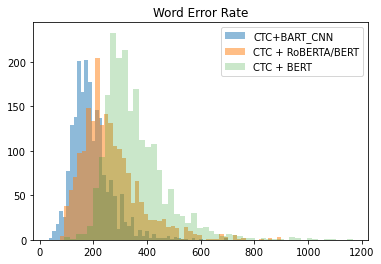

In [31]:
binct = 50

plt.hist(werlistbart_cnn_results, bins=binct, alpha=0.5, label='CTC+BART_CNN')
plt.hist(werlistrbert_results, bins=binct, alpha=0.5, label='CTC + RoBERTA/BERT')
# plt.hist(werlistroberta_results, bins=binct, alpha=0.25, label='CTC + RoBERTa')
plt.hist(werlistbert_results, bins=binct, alpha=0.25, label='CTC + BERT')
plt.legend(loc='upper right')
plt.title("Word Error Rate")
plt.show()

#gpt 2 decoder
#bart - denoising pretraining; trained as encoder+decoder and not just encoder
#use a real decoder as a decoder

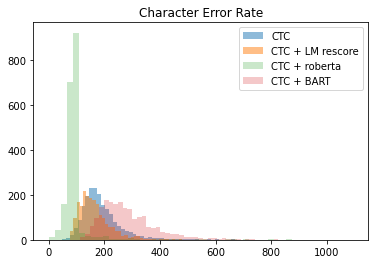

In [33]:
# bins = numpy.linspace(-10, 10, 100)

plt.hist(cerlistbart_cnn_results, bins=binct, alpha=0.5, label='CTC')
plt.hist(cerlistrbert_results, bins=binct, alpha=0.5, label='CTC + LM rescore')
plt.hist(cerlistroberta_results, bins=binct, alpha=0.25, label='CTC + roberta')
plt.hist(cerlistbert_results, bins=binct, alpha=0.25, label='CTC + BART')
plt.legend(loc='upper right')
plt.title("Character Error Rate")
plt.show()

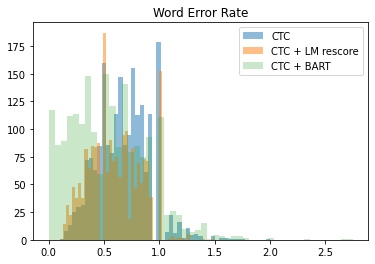

In [46]:
# bins = numpy.linspace(-10, 10, 100)
binct = 50

plt.hist(werlist, bins=binct, alpha=0.5, label='CTC')
plt.hist(werlistl, bins=binct, alpha=0.5, label='CTC + LM rescore')
plt.hist(werlistb, bins=binct, alpha=0.25, label='CTC + BART')
plt.legend(loc='upper right')
plt.title("Word Error Rate")
plt.show()

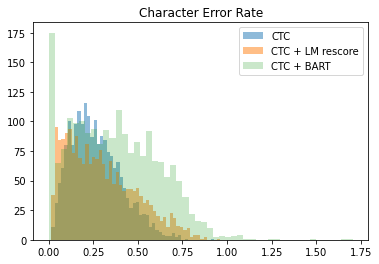

In [47]:
# bins = numpy.linspace(-10, 10, 100)

plt.hist(cerlist, bins=binct, alpha=0.5, label='CTC')
plt.hist(cerlistl, bins=binct, alpha=0.5, label='CTC + LM rescore')
plt.hist(cerlistb, bins=binct, alpha=0.25, label='CTC + BART')
plt.legend(loc='upper right')
plt.title("Character Error Rate")
plt.show()

In [49]:
from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL', 'rouge2'], use_stemmer=True)
scores = scorer.score('The quick brown fox jumps over the lazy dog',
                      'The quick brown dog jumps on the log.')

#target,prediction

scores

{'rouge1': Score(precision=0.75, recall=0.6666666666666666, fmeasure=0.7058823529411765),
 'rougeL': Score(precision=0.625, recall=0.5555555555555556, fmeasure=0.5882352941176471),
 'rouge2': Score(precision=0.2857142857142857, recall=0.25, fmeasure=0.26666666666666666)}

In [5]:
import re
for index, row in bart_results.iterrows():
    y = row['target_text']
    pred = row['pred_text']
    string_no_punctuation = re.sub("[^\w\s]", "", pred)
    print(string_no_punctuation.split())

['Hanno', 'wrote', 'of', 'his', 'expedition', 'in', 'Stel']
['Little', 'Italy', 'differs', 'from', 'many', 'other', 'meer', 'neighborhoods', 'in', 'many', 'ways']
['You', 'as', 'well', 'have', 'the', 'ability', 'to', 'flow', 'on', 'the', 'song', 'Her']
['His', 'major', 'concern', 'is', 'ungambler', 'communications', 'a', 'technique', 'to', 'base', 'communications', 'in', 'silo', 'development']
['The', 'mansion', 'also', 'has', 'a', 'marriage', 'office']
['Hinnys', 'can', 'land', 'and', 'lounge', 'on', 'its', 'deck']
['All', 'of', 'the', 'series', 'have', 'been', 'collected', 'into', 'trade', 'paper', 'backs']
['Jane', 'and', 'Roger', 'nearly', 'fell', 'overboard']
['We', 'like', 'to', 'seek', 'clear', 'weather']
['The', 'stream', 'near', 'the', 'river', 'is', 'still', 'called', 'Rideau', 'Brook', 'after', 'the', 'rivers', 'course']
['It', 'is', 'located', 'near', 'the', 'schools', 'entrance', 'to', 'Church', 'Lane']
['The', 'show', 'was', 'eventually', 'staged', 'for', 'four', 'knights

['Shes', 'gonna', 'kill', 'John', 'and', 'the', 'colonel']
['The', 'humans', 'on', 'Terra', 'Nova', 'used', 'this', 'technology', 'to', 'develop', 'spice', 'travel']
['Change', 'was', 'married', 'for', 'five', 'years', 'to', 'write', 'a', 'Frank', 'Chin']
['He', 'was', 'a', 'mainstay', 'of', 'the', 'AustroHungarian', 'army', 'and', 'repelled', 'attack', 'from', 'that', 'time', 'on']
['The', 'people', 'elect', 'an', 'Alderman', 'and', 'a', 'five', 'member', 'town', 'council', 'every', 'four', 'years']
['Carlmont', 'made', 'Ice', 'Age', 'one', 'of', 'Disneys', 'most', 'colorful', 'and', 'expensive', 'films']
['A', 'promenade', 'does', 'not', 'accord', 'with', 'this', 'type', 'of', 'office', 'and', 'is', 'thus', 'largely', 'discouraged']
['Dungeness', 'crab', 'is', 'fished', 'commercially', 'and', 'oysters', 'are', 'commercially', 'fished', 'on', 'the', 'bay']
['Porter', 'was', 'born', 'in', 'Mobile', 'Alabama', 'to', 'Dorothea', 'and', 'James']
['Undergross', 'grasshoppers', 'want', 'to'

In [60]:
import nltk

hypothesis = ['It', 'is', 'a', 'cat', 'at', 'room']
reference = ['It', 'is', 'a', 'cat', 'inside', 'the', 'room']
#there may be several references
BLEUscore = nltk.translate.bleu_score.sentence_bleu([reference], hypothesis)
print(BLEUscore)

0.4548019047027907


In [21]:
import error
import fastwer
from time import perf_counter

In [23]:
for key, val in ctc_test.items():
    print(val)
    print(gold[key])
    
    start = perf_counter()
    error.cer(val, gold[key])
    print(perf_counter()-start)
    
    start = perf_counter()
    error.wer(val, gold[key])
    print(perf_counter()-start)
    
    start = perf_counter()
    print(fastwer.score_sent(val, gold[key]))
    print(perf_counter()-start)
    
    start = perf_counter()
    fastwer.score_sent(val, gold[key], char_level=True)
    print(perf_counter()-start)
    break

hanno rot of his expedition in stel
Hannu wrote of his expedition in stone.
0.000484247000713367
2.6545996661297977e-05
42.8571
4.2263003706466407e-05
1.4076002116780728e-05


In [13]:
!pip3 install fastwer

  Using cached fastwer-0.1.3.tar.gz (4.6 kB)
  Created wheel for fastwer: filename=fastwer-0.1.3-cp36-cp36m-linux_x86_64.whl size=58907 sha256=b5e11e67426a528e6717443bfb4ac534722fec7de7bd87c9c691edbff11ff030
  Stored in directory: /home/ec2-user/.cache/pip/wheels/5b/3a/d4/c2c578166948e5523cbb896b3b71dcee6a64b22099a3c7accb
Successfully built fastwer
